In [55]:
#import all relavent packages 

import pandas as pd
import numpy as np
import seaborn as sns


In [72]:
#Load the dataset
aqi = pd.read_excel('AirQuality.xlsx')
aqi.head()

,Country,State,city,place,lastupdate,Avg,Max,Min,Pollutants
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,70.0,108.0,42.0,PM2.5
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,76.0,102.0,43.0,PM10
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,73.0,118.0,46.0,NO2
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,5.0,6.0,4.0,NH3
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",21-12-2018 03:00:00,41.0,109.0,2.0,SO2


In [73]:
aqi.columns

Index(['Country', 'State', 'city', 'place', 'lastupdate', 'Avg', 'Max', 'Min',
       'Pollutants'],
      dtype='object')

In [74]:
aqi.shape

(824, 9)

In [75]:
aqi.dtypes

Country        object
State          object
city           object
place          object
lastupdate     object
Avg           float64
Max           float64
Min           float64
Pollutants     object
dtype: object

In [76]:
aqi['State'].value_counts()

Delhi             239
Uttar_Pradesh      90
Rajasthan          69
Karnataka          66
Maharashtra        59
West_Bengal        50
Punjab             49
Telangana          40
Madhya Pradesh     39
Andhra_Pradesh     33
Haryana            31
TamilNadu          15
Bihar              14
Odisha             13
Kerala              7
Jharkhand           5
Gujarat             5
Name: State, dtype: int64

In [77]:
aqi = aqi.drop('lastupdate', axis=1)
aqi.head(4)

,Country,State,city,place,Avg,Max,Min,Pollutants
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",70.0,108.0,42.0,PM2.5
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",76.0,102.0,43.0,PM10
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",73.0,118.0,46.0,NO2
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",5.0,6.0,4.0,NH3


In [78]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 8 columns):
Country       824 non-null object
State         824 non-null object
city          824 non-null object
place         824 non-null object
Avg           788 non-null float64
Max           788 non-null float64
Min           788 non-null float64
Pollutants    824 non-null object
dtypes: float64(3), object(5)
memory usage: 51.6+ KB


In [79]:
aqi.isnull().sum()

Country        0
State          0
city           0
place          0
Avg           36
Max           36
Min           36
Pollutants     0
dtype: int64

In [83]:
i = aqi['Avg'].mean()
j = aqi['Max'].mean()
k = aqi['Min'].mean()

In [84]:
aqi['Avg'] = aqi['Avg'].fillna(i)
aqi['Max'] = aqi['Max'].fillna(j)
aqi['Min'] = aqi['Min'].fillna(k)

In [85]:
aqi.isnull().sum()

Country       0
State         0
city          0
place         0
Avg           0
Max           0
Min           0
Pollutants    0
dtype: int64

In [148]:
aqi['Pollutants'].value_counts()

NO2      129
CO       128
PM2.5    127
SO2      121
OZONE    119
PM10     108
NH3       92
Name: Pollutants, dtype: int64

In [202]:
# plotting avg,min,max pollution of india

import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Avg pollution data in india ')

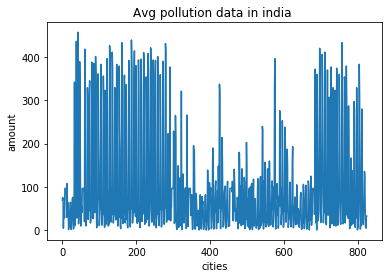

In [89]:
plt.plot(aqi['Avg'])
plt.xlabel('cities')
plt.ylabel('amount')
plt.title('Avg pollution data in india ')

Text(0.5, 1.0, 'max pollution data')

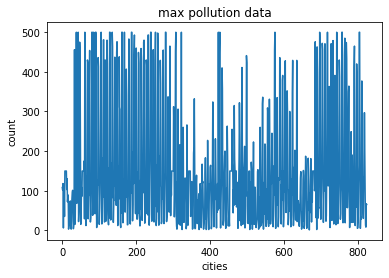

In [96]:
plt.plot(aqi['Max'])
plt.xlabel('cities')
plt.ylabel('count')
plt.title('max pollution data')

Text(0.5, 1.0, 'min pollution data')

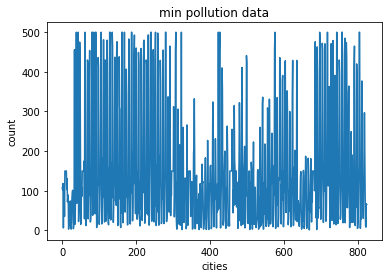

In [97]:
plt.plot(aqi['Max'])
plt.xlabel('cities')
plt.ylabel('count')
plt.title('min pollution data')

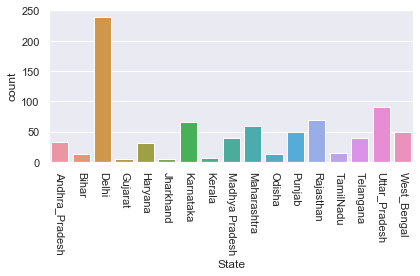

In [161]:
#checking which state has most pollution

plt.plot(figsize=(22,2), dpi= 80)
sns.set(style='darkgrid')
char=sns.countplot(x= 'State', data= aqi, orient="h")

char.set_xticklabels(char.get_xticklabels(), rotation=270)
plt.xlabel('State')
plt.tight_layout()

Text(0.5, 1.0, 'NO2 levels in air')

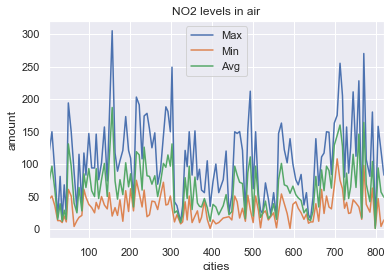

In [157]:
#plotting min,max, avg air pollution(pollution wise= no2, co, ozone.. )
aqi1 = aqi[aqi.Pollutants =='NO2']
aqi1[['Max','Min','Avg']].plot()
plt.xlabel('cities')
plt.ylabel('amount')
plt.title('NO2 levels in air')

In [165]:
#plotting min,max,avg of air pollution(state wise)

from pandas import DataFrame

st = DataFrame(aqi.State)
DataFrame.drop_duplicates(st)

,State
0,Andhra_Pradesh
33,Bihar
47,Delhi
286,Gujarat
291,Haryana
322,Jharkhand
327,Karnataka
393,Kerala
400,Madhya Pradesh
439,Maharashtra


Text(0.5, 1.0, 'telangana air pollution')

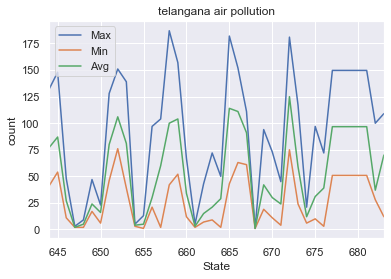

In [170]:
aqi1 = aqi[aqi.State == 'Telangana']
aqi1[['Max','Min','Avg']].plot()
plt.xlabel('State')
plt.ylabel('count')
plt.title('telangana air pollution')

Text(0.5, 1.0, 'Delhi air pollution')

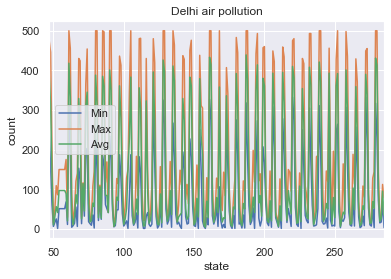

In [172]:
aqi1 = aqi[aqi.State == 'Delhi']
aqi1[['Min','Max','Avg']].plot()
plt.xlabel('state')
plt.ylabel('count')
plt.title('Delhi air pollution')

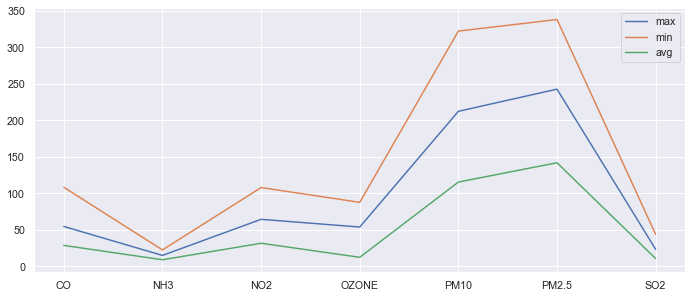

In [179]:
#plotting mean pollutant amount

aqi2= aqi.groupby('Pollutants')
k= aqi2.mean()

plt.figure(figsize=(12,5), dpi=70)
plt.plot(k)
plt.legend(['max','min','avg'])

In [186]:
#mean pollutant air quality by statewise

aqi_s =aqi.groupby('State')
kk= aqi_s.mean()

Text(0.5, 1.0, 'Air quality by statewise')

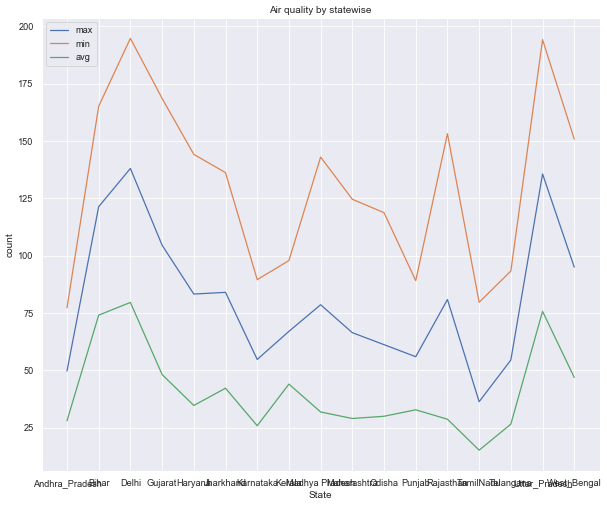

In [194]:
plt.figure(figsize=(12,10), dpi =60)
plt.plot(kk)
#char.set_xticklabels(char.get_xticklabels(), rotation=270)
plt.legend(['max','min','avg'])
plt.xlabel('State')
plt.ylabel('count')
plt.title('Air quality by statewise')

In [195]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 8 columns):
Country       824 non-null object
State         824 non-null object
city          824 non-null object
place         824 non-null object
Avg           824 non-null float64
Max           824 non-null float64
Min           824 non-null float64
Pollutants    824 non-null object
dtypes: float64(3), object(5)
memory usage: 51.6+ KB


In [197]:
aqi['Country'].unique()

array(['India'], dtype=object)

In [198]:
aqi.drop('Country', inplace= True,axis=1)
aqi.head()

,State,city,place,Avg,Max,Min,Pollutants
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",70.0,108.0,42.0,PM2.5
1,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",76.0,102.0,43.0,PM10
2,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",73.0,118.0,46.0,NO2
3,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",5.0,6.0,4.0,NH3
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",41.0,109.0,2.0,SO2


In [206]:
by_state= aqi.groupby('State')
print("max air pollution by citywise ")
by_state.max()['city']

max air pollution by citywise 


State
Andhra_Pradesh         Visakhapatnam
Bihar                          Patna
Delhi                          Delhi
Gujarat                    Ahmedabad
Haryana                       Rohtak
Jharkhand                 Jorapokhar
Karnataka                   Hubballi
Kerala            Thiruvananthapuram
Madhya Pradesh                Ujjain
Maharashtra                    Thane
Odisha                       Talcher
Punjab                      Rupnagar
Rajasthan                    Udaipur
TamilNadu                    Chennai
Telangana                  Hyderabad
Uttar_Pradesh               Varanasi
West_Bengal                 Siliguri
Name: city, dtype: object

In [209]:
by_state.min()['city']

State
Andhra_Pradesh             Amaravati
Bihar                           Gaya
Delhi                          Delhi
Gujarat                    Ahmedabad
Haryana                    Faridabad
Jharkhand                 Jorapokhar
Karnataka                  Bengaluru
Kerala            Thiruvananthapuram
Madhya Pradesh                 Dewas
Maharashtra               Aurangabad
Odisha                  Brajrajnagar
Punjab                      Amritsar
Rajasthan                      Ajmer
TamilNadu                    Chennai
Telangana                  Hyderabad
Uttar_Pradesh                   Agra
West_Bengal                   Asanol
Name: city, dtype: object

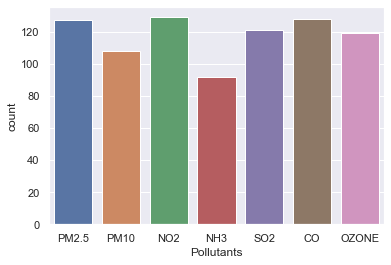

In [210]:
sns.countplot(x='Pollutants', data=aqi)

[Text(0, 0, 'Andhra_Pradesh'),
 Text(0, 0, 'Bihar'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Gujarat'),
 Text(0, 0, 'Haryana'),
 Text(0, 0, 'Jharkhand'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Kerala'),
 Text(0, 0, 'Madhya Pradesh'),
 Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Odisha'),
 Text(0, 0, 'Punjab'),
 Text(0, 0, 'Rajasthan'),
 Text(0, 0, 'TamilNadu'),
 Text(0, 0, 'Telangana'),
 Text(0, 0, 'Uttar_Pradesh'),
 Text(0, 0, 'West_Bengal')]

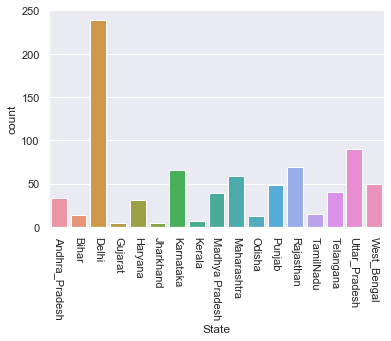

In [214]:
k= sns.countplot(x='State', data= aqi)
k.set_xticklabels(k.get_xticklabels(), rotation=270)